# Linear Time-Invariant Systems, Convolution and Filtering 

### Basic properties

#### Linearity 

We start by verifying the linearity of the convolution operator. Let us consider as example the system impulse response given by $h[n]=\alpha^n u[n]$, Let us take a system impulse response with $\alpha=0.999$ and as input signal one tone of frequency $2\pi40/1000$. We will use the command:

y = np.convolve(x,h,'valid')

In order to perform the convolution between the input $x$ and the impulse response $h$. Notice that such a command uses only the available data without performing zero padding, in contrast to what is done by

y = np.convolve(x,h).

When using only the available data in performing a convolution between a sequence $x$ of length $M$ and a sequence $h$ of length $L$, the convolution expression using only the available data can be written as:

if $M>L$ $\qquad y[n]=\sum_{l=1}^L h[l]x[n-l]\,,\quad n=L+1,\ldots,M$

if $L>M$ $\qquad y[n]=\sum_{m=1}^M x[m]h[n-m]\,,\quad n=M+1,\ldots,L$

the resulting signal is of length: $max(M-max(0,L-1),0)$

In [1]:
%pylab inline
import numpy as np
import math as m
from scipy import constants as c
from scipy import fftpack as f

alpha = 0.999
h = pow(alpha,np.arange(100)) #construct the impulse response of the system of length 100
y = np.linspace(0,999,1000)
x1 = np.sin((y*2*c.pi*40)/1000)
y1 = np.convolve(x1,h,'valid')
ny1 = np.size(y1)
print(ny1)

Populating the interactive namespace from numpy and matplotlib
901


You can visualize or play the input $x_1$ and the output $y_1$ to see the effect of the system. Notice that the dimension of $y_1$ is of $901$ samples.

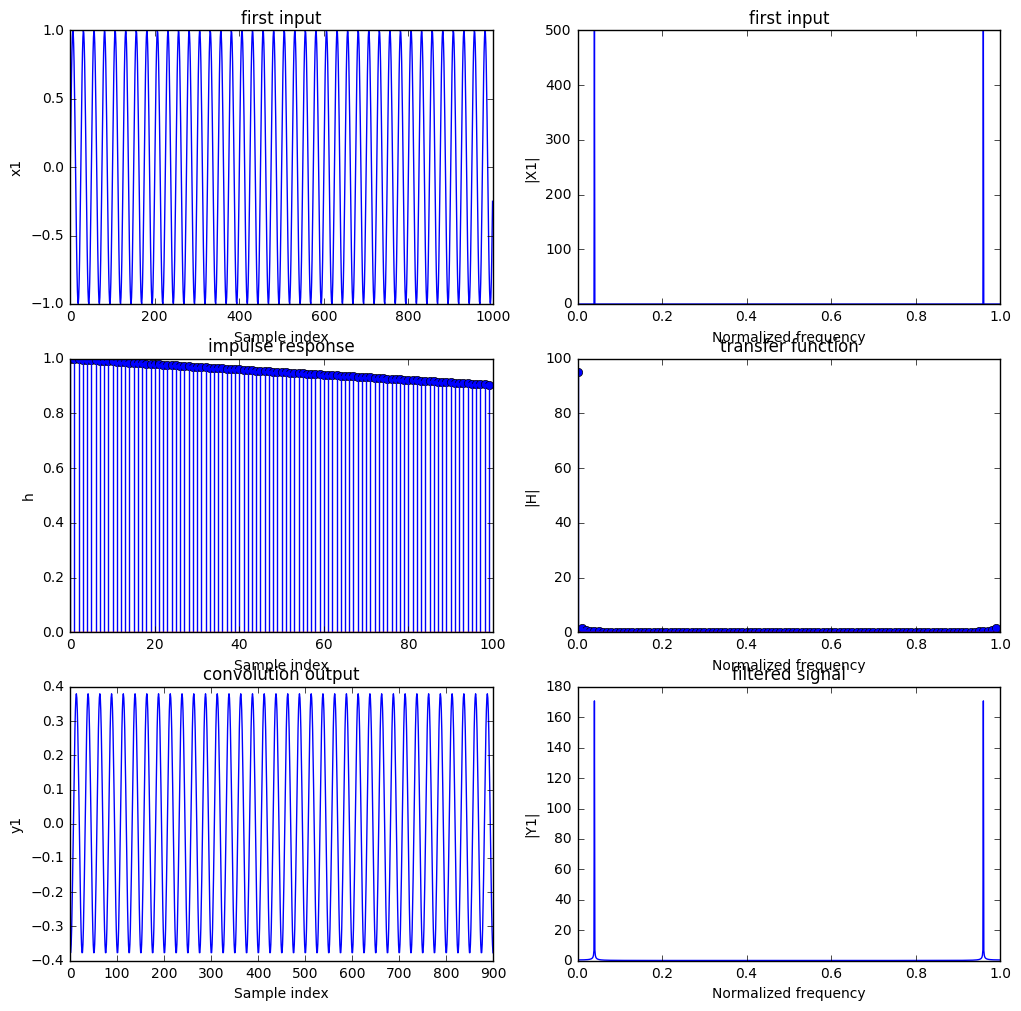

In [2]:
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

subplot(321)
plot(y,x1)
ylabel('x1'), xlabel('Sample index'), title('first input')

X1 = f.fft(x1,1000)
normFreqX1 = np.arange(1000,dtype=float)/(float(1000))
subplot(322)
plot(normFreqX1,abs(X1))
ylabel('|X1|'), xlabel('Normalized frequency'), title('first input')

subplot(323)
stem(np.arange(100),h)
ylabel('h'), xlabel('Sample index'), title('impulse response')

H = f.fft(h,100)
normFreqH = np.arange(100,dtype=float)/(float(100))
subplot(324)
stem(normFreqH,abs(H))
ylabel('|H|'), xlabel('Normalized frequency'), title('transfer function')

subplot(325)
plot(np.arange(ny1),y1)
ylabel('y1'), xlabel('Sample index'), title('convolution output')

Y1 = f.fft(y1,ny1)
normFreqY1 = np.arange(ny1,dtype=float)/(float(ny1))
subplot(326)
plot(normFreqY1,abs(Y1))
ylabel('|Y1|'), xlabel('Normalized frequency'), title('filtered signal')
show()

We now consider another one of the three tones of the Fourier example "three tones", namely

In [3]:
x2 = np.sin((y*2*c.pi*80)/1000)

The output of the system for the input $x_2$ is given by

In [4]:
y2 = np.convolve(x2,h,'valid')
ny2 = np.size(y2)

Once again, plotting or playing the output $y_2$ gives us an idea how the input has been modified.

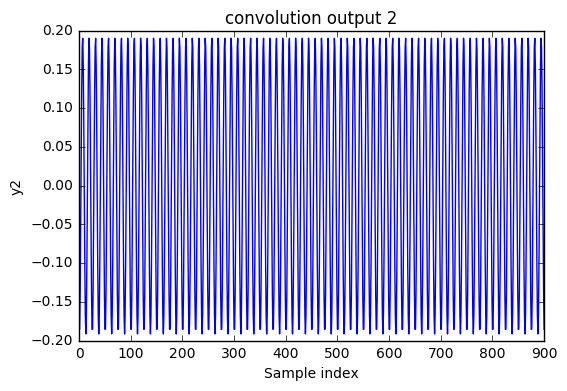

In [5]:
plot(np.arange(ny2),y2)
ylabel('y2'), xlabel('Sample index'), title('convolution output 2')
show()

Given that the system is linear, its output when the input is $ax_1+bx_2$ must be equal to $ay_1+by_2$. Let's check this out by taking $a=2$ and $b=−10$

In [6]:
a =2
b = -10
xx = a*x1 + b*x2
yy = np.convolve(xx,h,'valid')

Now we compute the error between the output of the system when the input is the linear combination $xx=ax_1+bx_2$ and the linear combination of the outputs $ay_1+by_2$

In [7]:
error = abs(yy - (a*y1 + b*y2))
maxError = max(error)
print(maxError)

2.04281036531e-14


a negligible value which is purely due to numerical computation errors. Therefore $(ax_1+bx_2)*h=ay_1+by_2$

#### Time invariance

Let us now now check the time invariance of a convolution system. Consider the same system as above with input $x1$ and output $y1$. We now introduce a time delay in the input signal, say of 100 samples and compute the corresponding output

In [8]:
x1Delayed = x1[100:1000]
y1InputDelayed = np.convolve(x1Delayed,h,'valid')

Given the time invariance of the system, y1InputDelayed must be equal to $y1$ with a time delay of 100 samples, i.e., y1InputDelayed=y1[100:901]. Indeed

In [9]:
y1Delayed = y1[100:ny1]
error2 = abs(y1InputDelayed -y1Delayed) # How is this 'abs' taken with 2 vectors of different size?
maxError2 = max(error2)
print(maxError2)

0.0


## Denoising with the Leaky Integrator

Working with finite sequences, we need to be careful on the choice of the length of the Fourier transform. We will use here the command for a $K$ point fft:

scipy.fftpack.fft(X,K).

When convoluting a sequence $x$ of length $N$ with a sequence $h$ of length $L<N$

y = np.convolve(x,h,'valid')

the result is of length $N−L+1$.

Therefore, we will consider $N−L+1$ point FFT.

#### Two simple tones

Consider a Leaky Integrator filter of order $10$. The corresponding impulse response is given by $h[n]=(1−\lambda)\lambda^nu[n]$, where $\lambda=(10-1)/10=0.9$

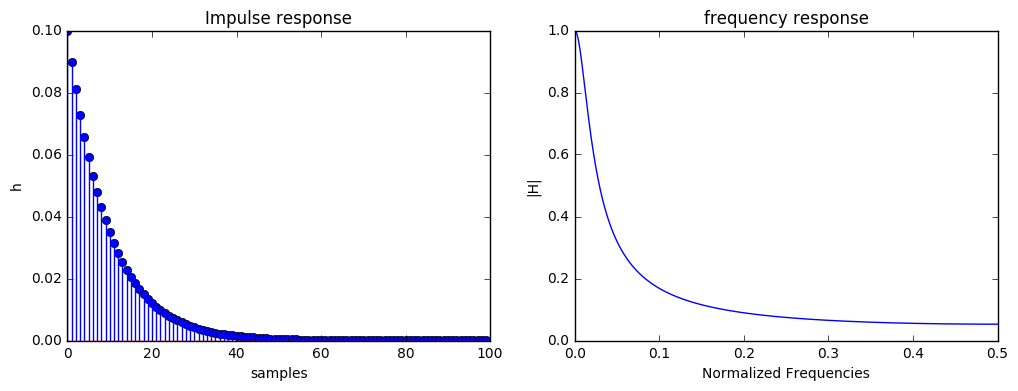

In [10]:
from scipy import fftpack as f

N = 2000# len(xNoisy)
L = 100 # len(h)

M = 10.0

lbd = (M-1)/(M)
h = (1-lbd)*pow(lbd,np.arange(L)) # constructs the impulse response of the system of length 100

H = f.fft(h,N-L+1)
normFrequ = np.arange(N-L+1,dtype=float)/(float(N-L+1)) # To plot vs the normalized frequencies

figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
subplot(1,2,1)
stem(np.arange(100),h)
xlabel('samples'), ylabel('h'), title('Impulse response')
subplot(1,2,2)
plot(normFrequ,abs(H))
xlabel('Normalized Frequencies'), ylabel('|H|'), title('frequency response'), xlim([0,0.5])
show()

Generate now a Gaussian white noise (sequence of independent random numbers that are generated according to the same Gaussian distribution)

In [11]:
sigma2 = 0.1    #Power of the noise (Variance)
noise = sigma2*np.random.randn(2000)    # Gaussian noise (zero mean)

that we add to the sequence of two pulses $x1$ and $x2$ that we have used in the previous example, that is:

In [12]:
x1 = np.sin((y*2*c.pi*40)/1000)
x2 = np.sin((y*2*c.pi*80)/1000)
x = np.append(x1,x2) # x is the concatenation of x1 and x2
Xf = f.fft(x,N-L+1)
xNoisy = noise + x # Noisy version of x
XNoisy = f.fft(xNoisy,N-L+1)

You can play or plot x and xNoisy to hear or see the effect of the noise

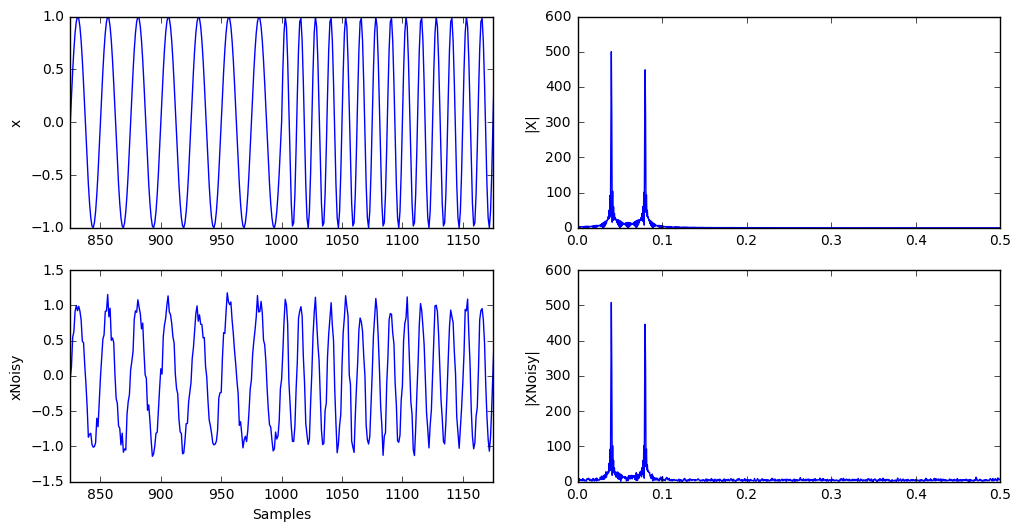

In [13]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

subplot(2,2,1)
plot(np.arange(x.size),x)
ylabel('x'), xlim([825,1175])
subplot(2,2,2)
plot(normFrequ,abs(Xf))
ylabel('|X|'), xlim([0,0.5])
subplot(2,2,3)
plot(np.arange(xNoisy.size),xNoisy)
xlabel('Samples'), ylabel('xNoisy'), xlim([825,1175])
subplot(2,2,4)
plot(normFrequ,abs(XNoisy))
ylabel('|XNoisy|'), xlim([0,0.5])

show()

Notice that we have plotted here the values of the sample 825 to the sample 1175, where the transition between the two tones occurs.

We now apply the leaky integrator to the noisy signal, both in the time domain and in the frequency domain to explain what is going on here

In [14]:
yConv = np.convolve(xNoisy,h,'valid')
Y = H*XNoisy  # Fast convolution can be obtained by  taking ifft of Y...

Once again you can play or plot the output of the signal y to hear and see the effect of the filter. When plotting it, be careful that, due to the convolution of finite length sequences, the output sequence y is of length 1901 and the transition between the two tones happens at the sample number 901 (and not number 1000 as of the input signal xNoisy)

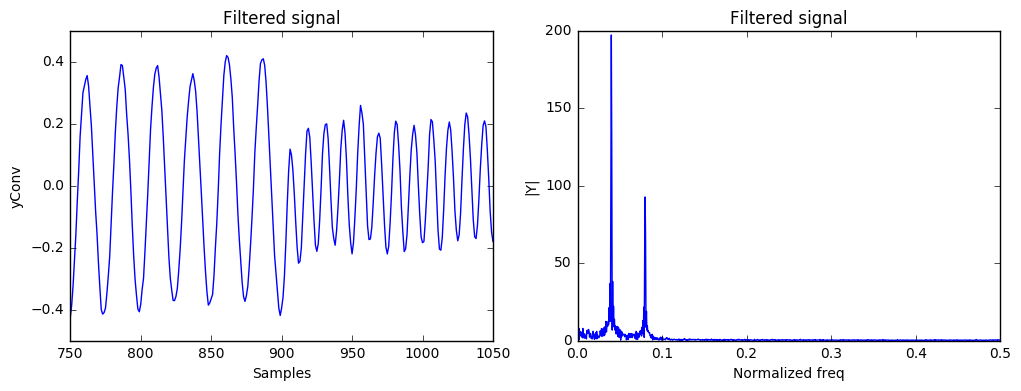

In [15]:
figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
subplot(1,2,1)
plot(np.arange(yConv.size),yConv)
xlabel('Samples'), ylabel('yConv'),title('Filtered signal'), xlim([750,1050])
subplot(1,2,2)
plot(normFrequ,abs(Y))
xlabel('Normalized freq'), ylabel('|Y|'), title('Filtered signal'),  xlim([0,0.5])
show()

As you can see, the output is "smoothed", that is, denoised. You can also remark the different effect on the two tones: The tone $x_2=sin(2\pi80n/1000)$, $n=1,\dots,1000$, has been attenuated with respect to the tone $x_1=sin(2\pi40n/1000)$, $n=1,…,1000$. The different attenuation of the two tones is clear observing the frequency domain action of the filter.

### Jingle

So let's now apply our denoising method to a human voice signal. Load the file jingle.mat into Python using the command

In [16]:
import scipy.io as sio
mat_contents = sio.loadmat('D:/TrabajoSwIng/Python/IPython Notebooks/DSPNumex_EPFL/NumEx5/jingle.mat')
jingle = mat_contents['jingle']
jingle = jingle.reshape(jingle.size,)
lenjin = np.size(jingle)
print(mat_contents)
print(lenjin)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/TrabajoSwIng/Python/IPython Notebooks/DSPNumex_EPFL/NumEx5/jingle.mat'

Verify the existing variables in memory

In [17]:
whos

Variable         Type       Data/Info
-------------------------------------
H                ndarray    1901: 1901 elems, type `complex128`, 30416 bytes
L                int        100
M                float      10.0
N                int        2000
X1               ndarray    1000: 1000 elems, type `complex128`, 16000 bytes
XNoisy           ndarray    1901: 1901 elems, type `complex128`, 30416 bytes
Xf               ndarray    1901: 1901 elems, type `complex128`, 30416 bytes
Y                ndarray    1901: 1901 elems, type `complex128`, 30416 bytes
Y1               ndarray    901: 901 elems, type `complex128`, 14416 bytes
a                int        2
alpha            float      0.999
b                int        -10
c                module     <module 'scipy.constants'<...>\constants\\__init__.py'>
error            ndarray    901: 901 elems, type `float64`, 7208 bytes
error2           ndarray    801: 801 elems, type `float64`, 6408 bytes
f                module     <module 'scipy.f

you can see that the vector (signal samples) jingle is of size $1x255000$. $Fs = 44100$ is the variable containing the frequency at which the song jingle has been sampled. By playing it you will probably recognize part of a famous jingle, but with a swiss yodeling touch! Now we add some noise

In [18]:
sigma = 0.01
noise = sigma * np.random.randn(lenjin)
jingleNoisy = jingle + noise

And construct the impulse response of the filter

In [19]:
# Construct the impulse response of the system of length 100
M = 10
lbd = float(M-1)/float(M)
h = (1-lbd) * pow(lbd,np.arange(100))

L = len(h)
N_J = len(jingle)

Plotting the signal and the filter's impulse response

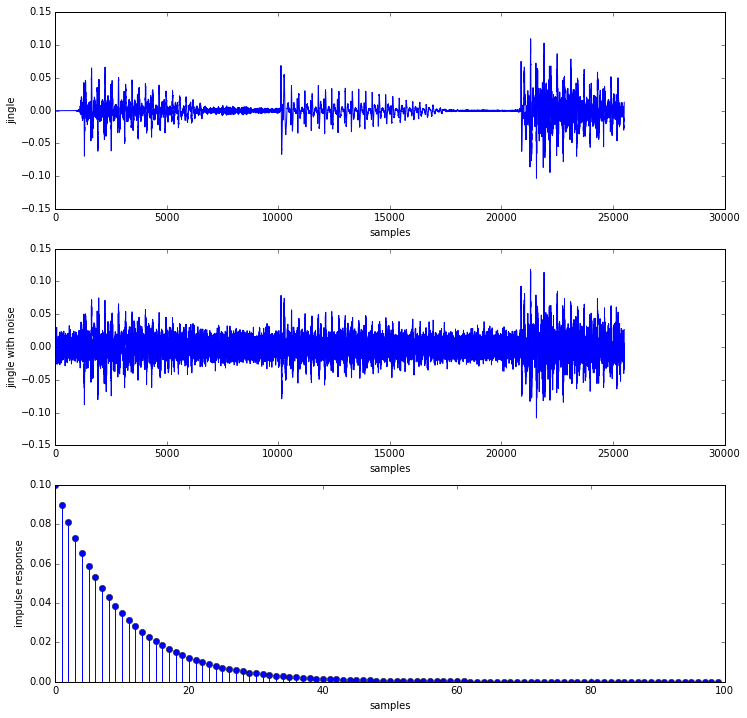

In [20]:
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
subplot(3,1,1)
plot(np.arange(N_J/10),jingle[0:N_J/10]) # show the signal to a tenth of its length 
ylabel('jingle'), xlabel('samples'), 
subplot(3,1,2)
plot(np.arange(N_J/10),jingleNoisy[0:N_J/10])
xlabel('samples'), ylabel('jingle with noise')
subplot(3,1,3)
stem(np.arange(L),h)
xlabel('samples'), ylabel('impulse response')
show()

We now apply the Leaky Integrator filter on jingleNoisy

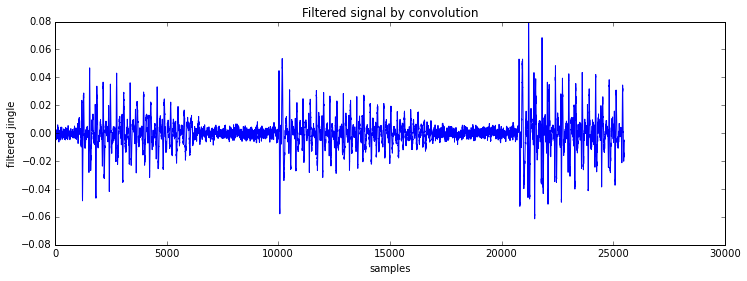

In [21]:
# In the time domain first
jingleConv = np.convolve(jingleNoisy,h,'valid')

figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plot(np.arange(N_J/10),jingleConv[0:N_J/10]) # show the filtered signal to a tenth of its length 
ylabel('filtered jingle'), xlabel('samples'), title('Filtered signal by convolution')
show()

Now we visualize the leaky integrator filter in the frequency domain

In [22]:
# then in the frequency domain 
from scipy import fftpack as f
Jingle = f.fft(jingle,N_J-L+1)
JingleNoisy  = f.fft(jingleNoisy,N_J-L+1)
H = f.fft(h,N_J-L+1)
normFrequ = np.arange(N_J-L+1,dtype = float)/float(N_J-L+1)
    
Y_J = H * JingleNoisy
jingle_f_conv = f.ifft(Y_J)

Compare teh different versions of the signal. In denoised $y$, noise is partially gone by the voice sounds bass .. what happened? Spectrum plots answer this question!

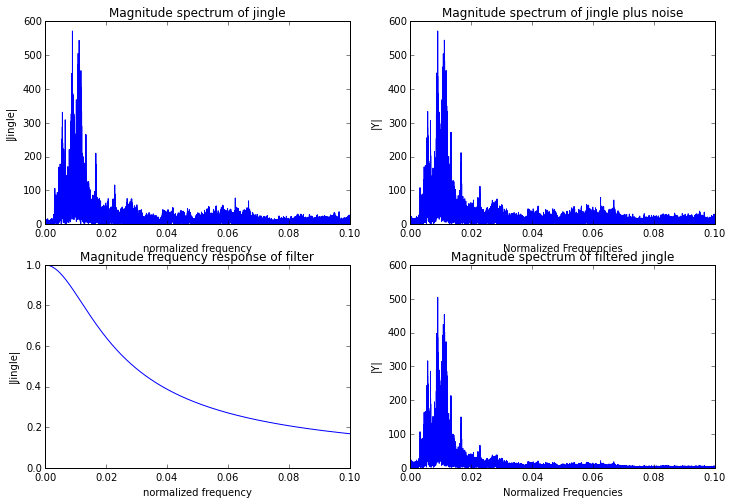

D:\Sw4Engineering\Anaconda3\lib\site-packages\numpy\core\numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


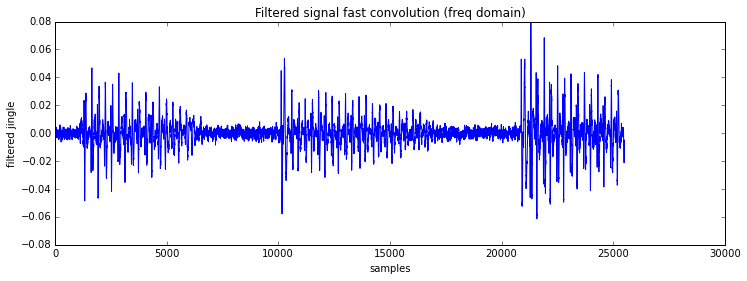

In [23]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
subplot(2,2,1) # abs(Jingle)
plot(np.arange(1,Jingle.size+1,dtype=float)/float(Jingle.size),abs(Jingle))
title('Magnitude spectrum of jingle')
ylabel('|Jingle|'), xlabel('normalized frequency'), xlim([0,0.1])
subplot(2,2,2) # abs(Jingle_Noisy)
plot(np.arange(1,JingleNoisy.size+1,dtype=float)/float(JingleNoisy.size),abs(JingleNoisy))
title('Magnitude spectrum of jingle plus noise')
xlabel('Normalized Frequencies'), ylabel('|Y|'), xlim([0,0.1])
subplot(2,2,3) # abs(H)
plot(np.arange(1,H.size+1,dtype=float)/float(H.size),abs(H))
title('Magnitude frequency response of filter')
ylabel('|Jingle|'), xlabel('normalized frequency'), xlim([0,0.1])
subplot(2,2,4) # abs(Y_J)
plot(np.arange(1,Y_J.size+1,dtype=float)/float(Y_J.size),abs(Y_J))
title('Magnitude spectrum of filtered jingle')
xlabel('Normalized Frequencies'), ylabel('|Y|'), xlim([0,0.1])
show()

figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
plot(np.arange(N_J/10),jingle_f_conv[0:N_J/10]) # show the filtered signal to a tenth of its length 
ylabel('filtered jingle'), xlabel('samples'), title('Filtered signal fast convolution (freq domain)')
show()
